In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [314]:
cases = []

nofusion_baseline_path = Path(Path.cwd(), 'Fusion_trials_baseline', 'Results')
print(f'Baseline exists: {nofusion_baseline_path.is_dir()}')
nofusion_baseline = {
    'path': nofusion_baseline_path,
    'name': 'No fusion baseline',
    }
cases.append(nofusion_baseline)

const_vv_path = Path(Path.cwd(), 'Fusion_trials_constVV', 'Results')
print(f'Constant VV costs exists: {const_vv_path.is_dir()}')
const_vv = {
    'path': const_vv_path,
    'name': 'FPP with constant vacuum vessel costs',
}
cases.append(const_vv)

expensive_var_vv_path = Path(Path.cwd(), 'Fusion_trials_varVV', 'Results_1')
print(f'Degrading VV costs exists: {expensive_var_vv_path.is_dir()}')
var_vv = {
    'path': expensive_var_vv_path,
    'name': 'FPP with variable and high vacuum vessel costs',
    }
cases.append(var_vv)

var_vv_path = Path(Path.cwd(), 'Fusion_trials_varVV', 'Results')
print(f'Degrading VV costs exists: {var_vv_path.is_dir()}')
var_vv = {
    'path': var_vv_path,
    'name': 'FPP with variable vacuum vessel costs',
    }
cases.append(var_vv)

var_vv_thermstor_path = Path(Path.cwd(), 'Fusion_trials_varVV_thermstor', 'Results')
print(f'Degrading VV costs with thermal storage exists: {var_vv_thermstor_path.is_dir()}')
var_vv_thermstor = {
    'path': var_vv_thermstor_path,
    'name': 'FPP with variable vacuum vessel costs and thermal storage',
    }
cases.append(var_vv_thermstor)

Baseline exists: True
Constant VV costs exists: True
Degrading VV costs exists: True
Degrading VV costs exists: True
Degrading VV costs with thermal storage exists: True


In [315]:
min_time = 1
max_time = 14 * 24

In [316]:
resources = [
    'fusion',
    'solar_pv',
    'offshore_wind',
    'onshore_wind',
    'battery',
    'natural_gas_ccs',
    'natural_gas',
    'nuclear',
    'Total'
]

resource_names = {
    'fusion': 'Fusion Power Plant',
    'solar_pv': 'Utility-Scale Solar PV',
    'offshore_wind': 'Offshore Wind',
    'onshore_wind': 'Onshore Wind',
    'battery': '6-hr Li-ion Batteries',
    'natural_gas_ccs': 'Natural Gas with CCS',
    'natural_gas': 'Natural Gas',
    'nuclear': 'Fission Power Plant',
    'Total': 'Total'
}

resource_colors_temp = {
    'fusion': 'xkcd:light red',
    'solar_pv': 'xkcd:goldenrod',
    'offshore_wind': 'xkcd:light aqua',
    'onshore_wind': 'xkcd:turquoise',
    'battery': 'xkcd:pink',
    'natural_gas_ccs': 'xkcd:grey',
    'natural_gas': 'xkcd:orange',
    'nuclear': 'xkcd:sky blue',
    'Total': 'xkcd:grey'
}

resource_colors = {}
for k, v in resource_names.items():
    resource_colors[v] = resource_colors_temp[k]


In [318]:
for case in cases:
    case['power'] = pd.read_csv(Path(case['path'], 'power.csv'), index_col=0)
    case['power'].drop(['Zone', 'AnnualSum'], inplace=True)
    if case['path'] == nofusion_baseline_path:
        case['power']['fusion'] = np.zeros(8760)
    case['power'] = case['power'][resources]
    case['power'].rename(columns=resource_names, inplace=True)
    case['power'].drop(columns=['Total', 'Fission Power Plant'], inplace=True)
    case['power'].index = np.linspace(1, 8760, 8760)

In [319]:
for case in cases:
    case['charge'] = pd.read_csv(Path(case['path'], 'charge.csv'), index_col=0)
    case['charge'].drop(['Zone', 'AnnualSum'], inplace=True)
    if case['path'] == nofusion_baseline_path:
        case['charge']['fusion'] = np.zeros(8760)
    case['charge'] = case['charge'][resources]
    case['charge'].rename(columns=resource_names, inplace=True)
    case['charge'].drop(columns=['Total', 'Fission Power Plant'], inplace=True)
    case['charge'].index = np.linspace(1, 8760, 8760)

In [320]:
for case in cases:
    case['capacity'] = pd.read_csv(Path(case['path'], 'capacity.csv'), index_col=0)
    case['capacity'].rename(index=resource_names, inplace=True)
    case['capacity'].drop(['Total', 'Fission Power Plant'], inplace=True)

# Power Time Series

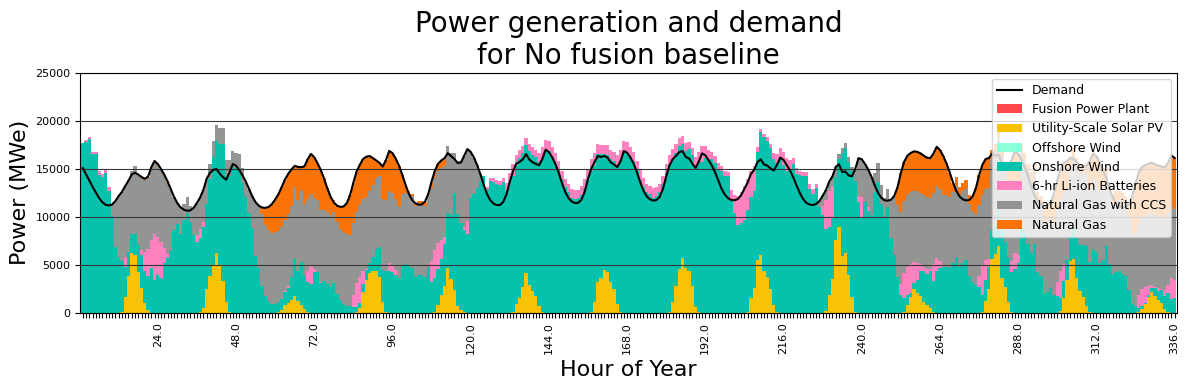

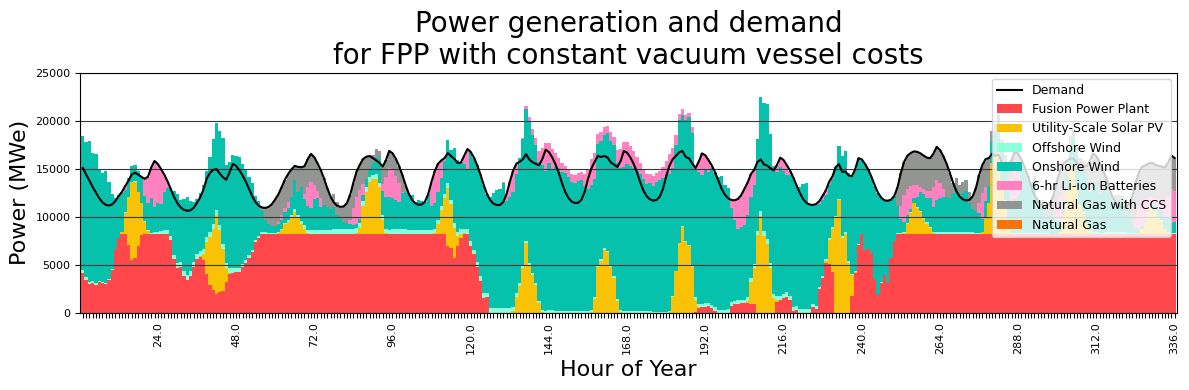

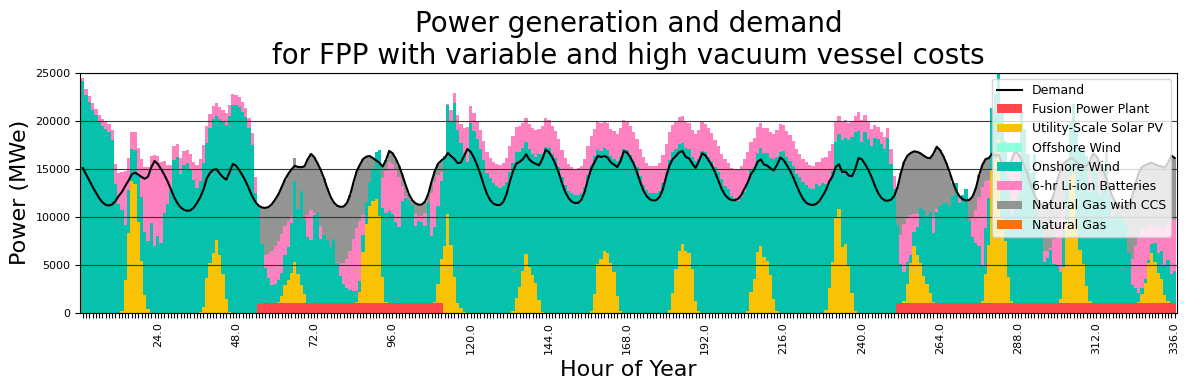

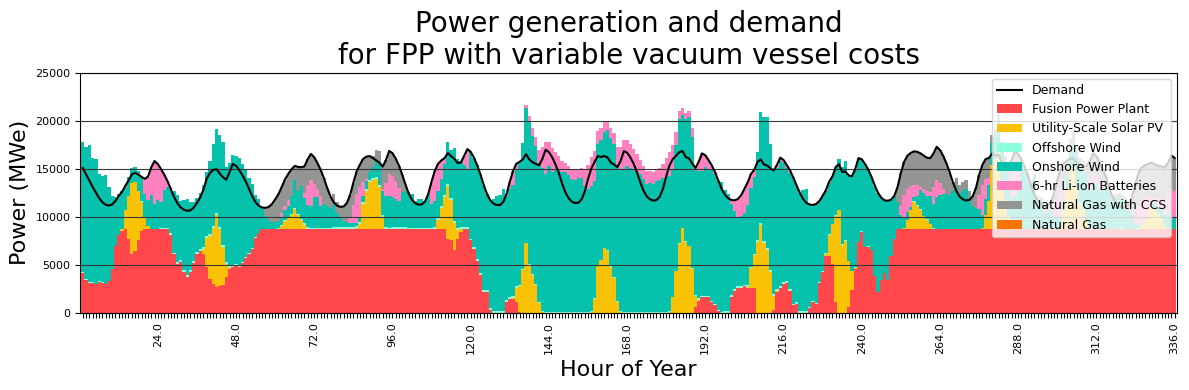

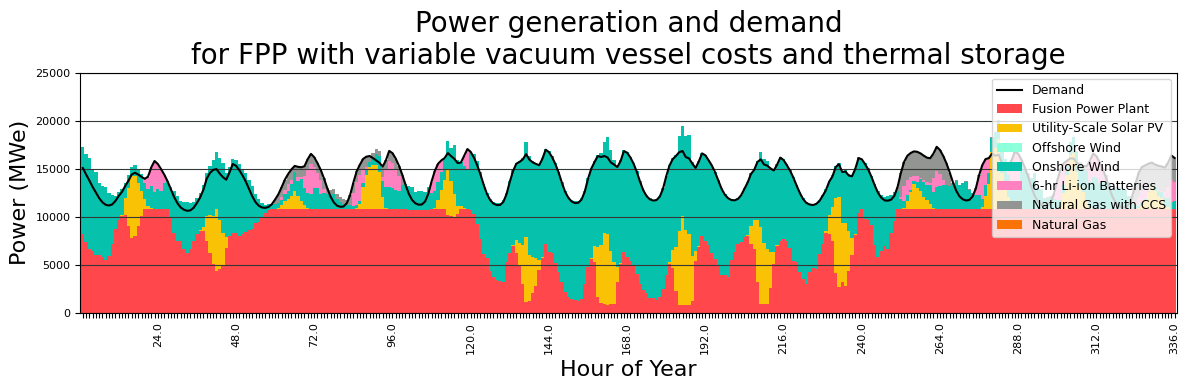

In [325]:
for case in cases:
    fig, ax = plt.subplots(figsize=(12, 4))
    temp_pow = case['power'].loc[min_time:max_time, :]
    temp_pow.plot.bar(ax=ax, stacked=True, width=1.0, fontsize=8, color=resource_colors)
    ax.set_xticklabels([t if not (i+1)%24 else "" for i,t in enumerate(ax.get_xticklabels())])
    ax.set_ylim([0, 25000])

    temp_charge = case['charge'].loc[min_time:max_time, :]
    demand = ax.plot(
        np.linspace(min_time-1, max_time-1, max_time),
        temp_pow.sum(axis=1) - temp_charge.sum(axis=1),
        color='xkcd:black',
        label='Demand'
    )

    handles, labels = ax.get_legend_handles_labels()
    # handles.append(demand[0])
    # labels.append('Demand')
    ax.legend(handles, labels, loc='upper right', fontsize=9)

    ax.grid(True, axis='y', color='xkcd:dark grey')
    ax.set_xlabel('Hour of Year', fontsize = 16)
    ax.set_ylabel('Power (MWe)', fontsize = 16)
    ax.set_title(f'Power generation and demand\nfor {case["name"]}', fontsize = 20)
    fig.tight_layout()


# Capacity factors

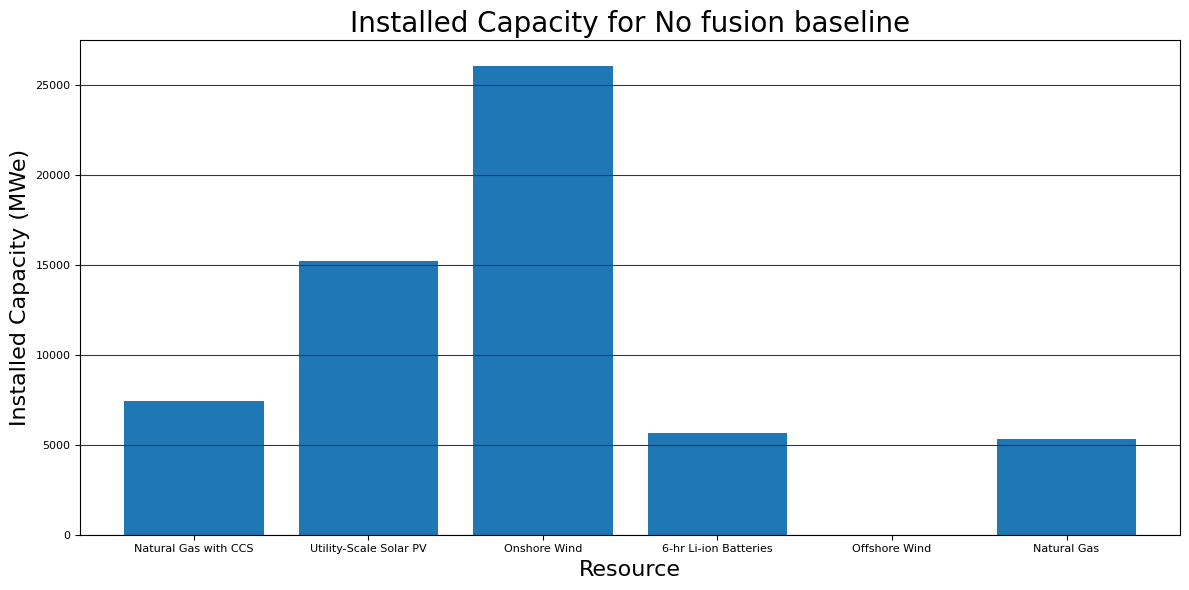

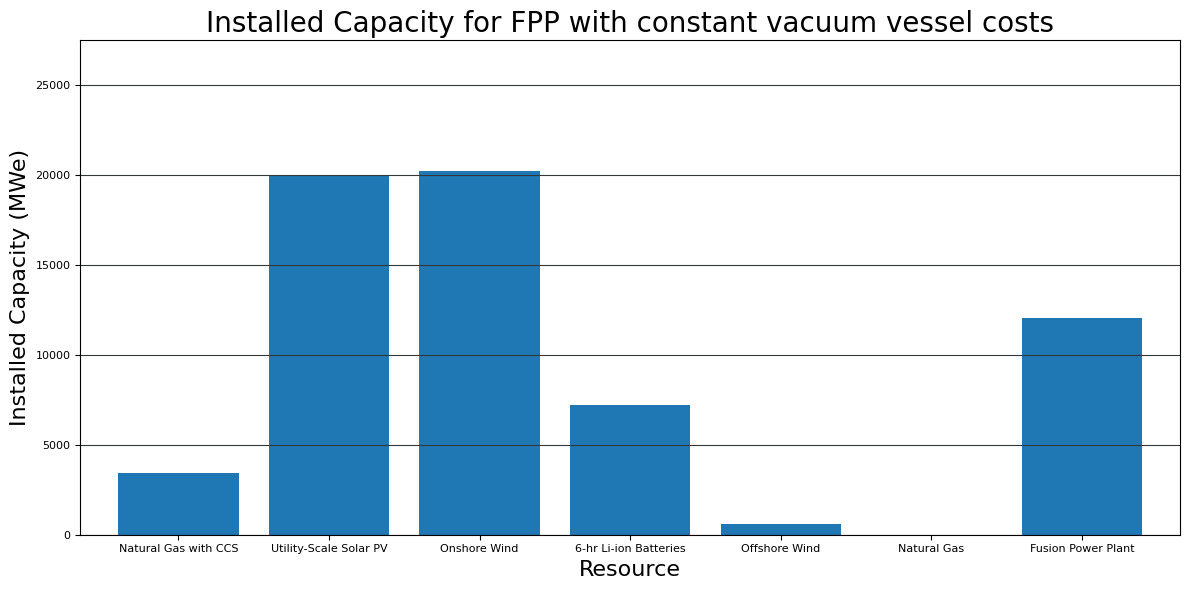

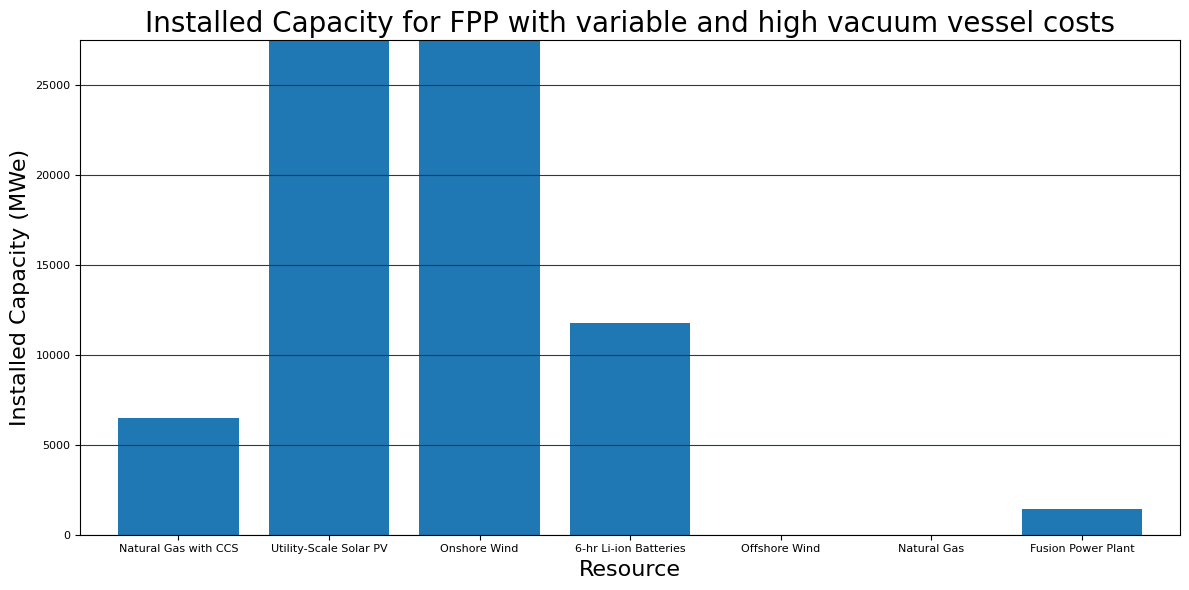

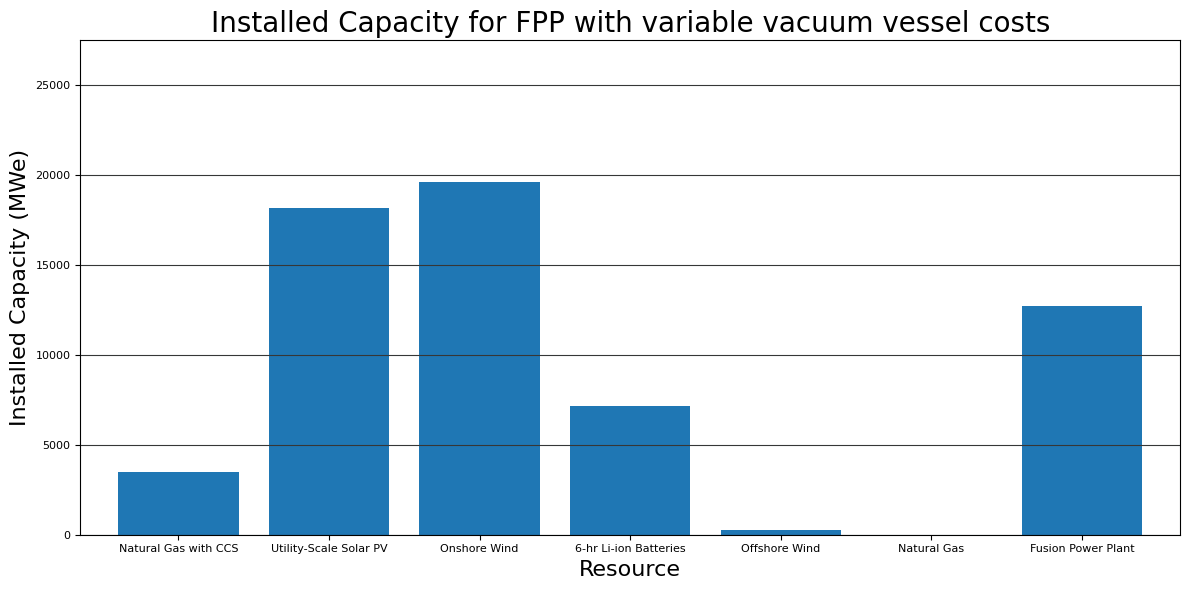

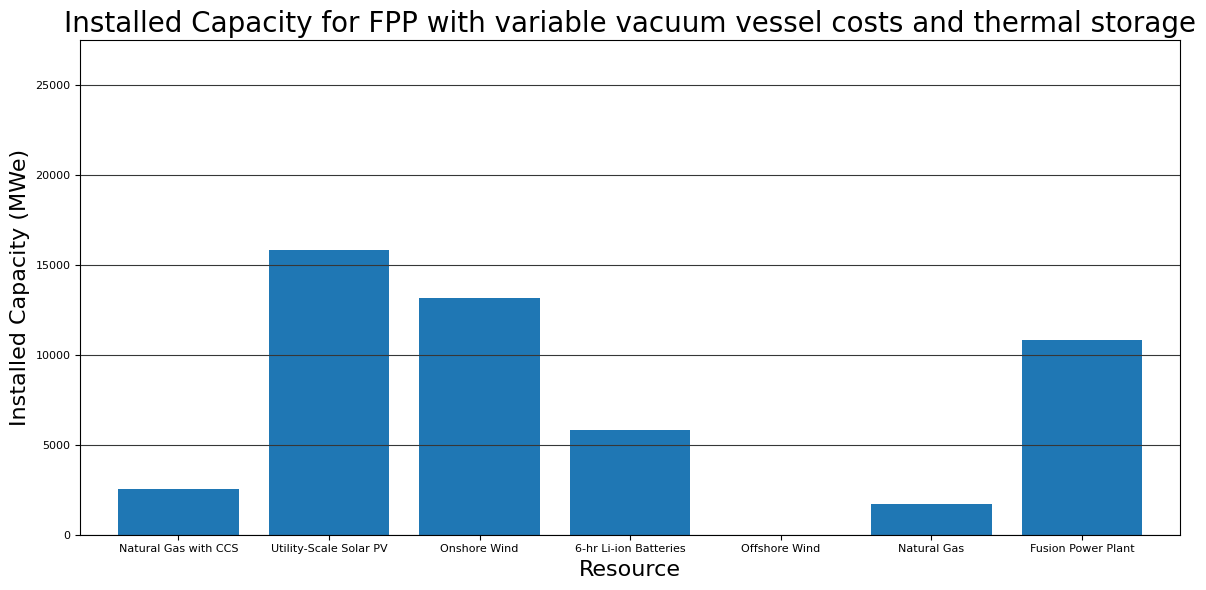

In [322]:
for case in cases:  
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    temp_cap = case['capacity'].loc[:,'EndCap']  
    temp_cap.plot.bar(ax=ax, width=0.8, fontsize=8, rot=0)
    # ax = temp_cap.plot.bar(width=0.8, fontsize=8, figsize=(12, 6), rot=0)
    ax.grid(True, axis='y', color='xkcd:dark grey')
    ax.set_xlabel('Resource', fontsize = 16)
    ax.set_ylabel('Installed Capacity (MWe)', fontsize = 16)
    ax.set_ylim([0, 27500])
    ax.set_title(f'Installed Capacity for {case["name"]}', fontsize = 20)
    fig.tight_layout()

# Capacity comparison to baseline

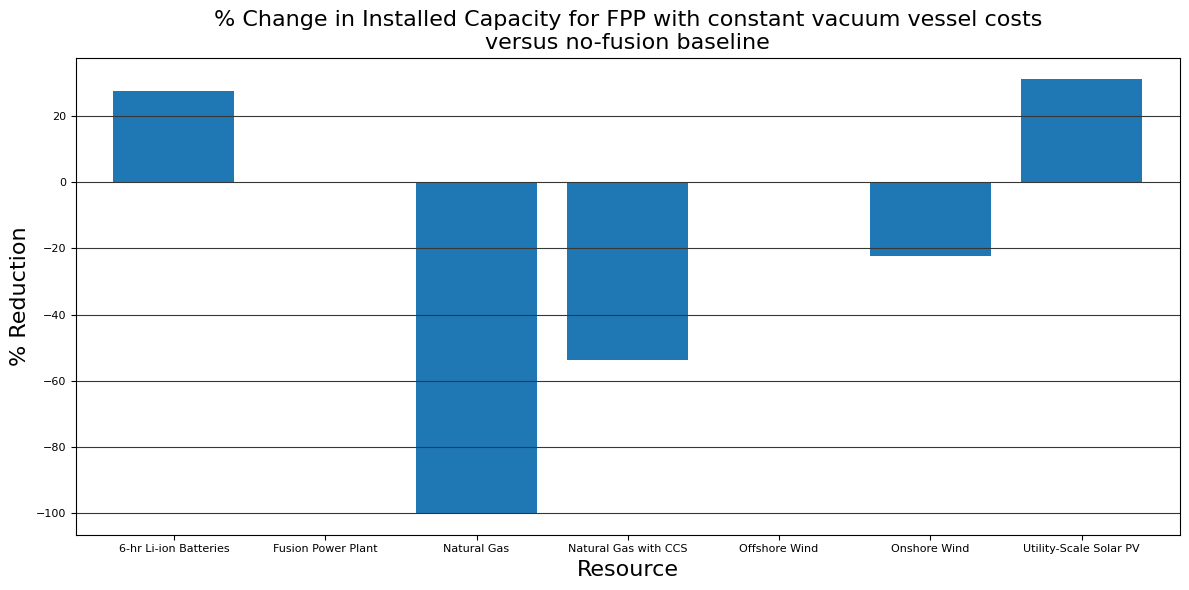

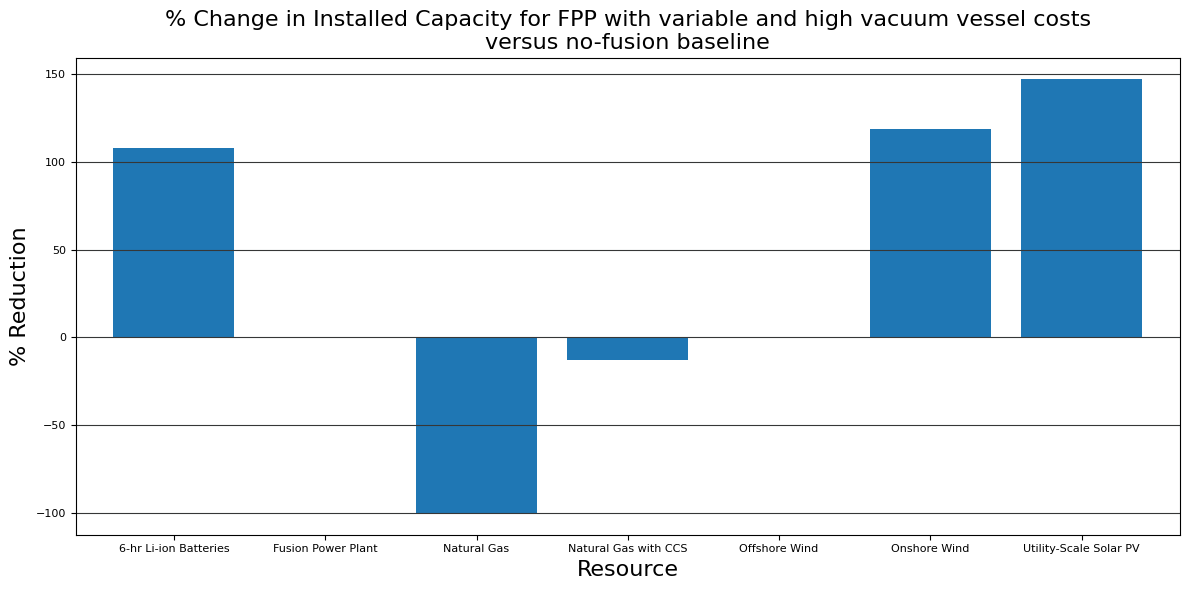

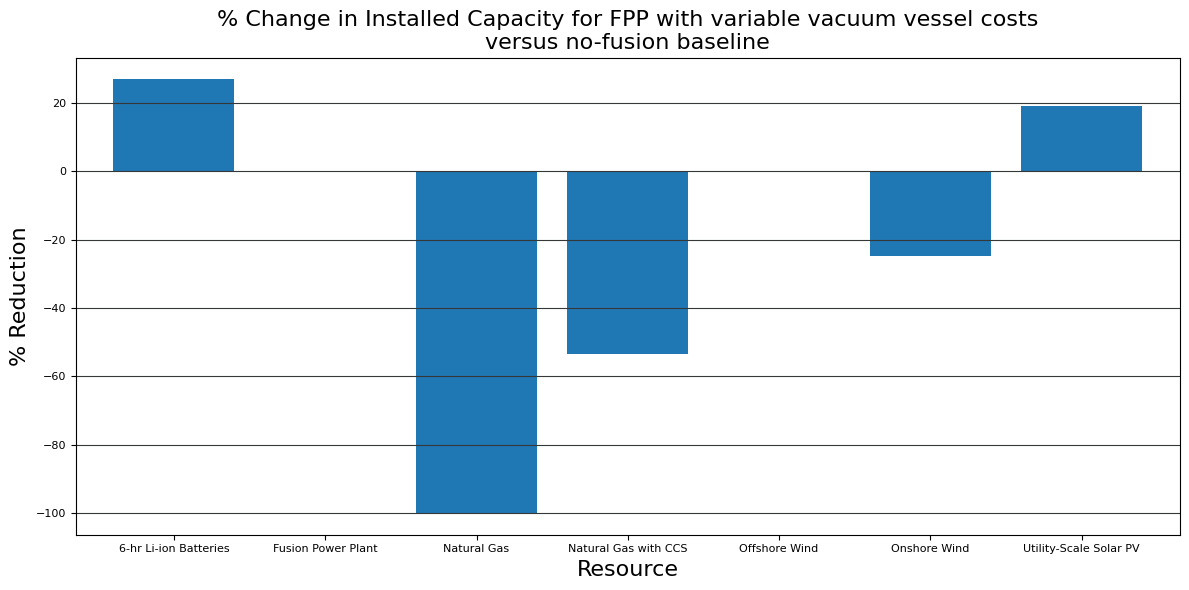

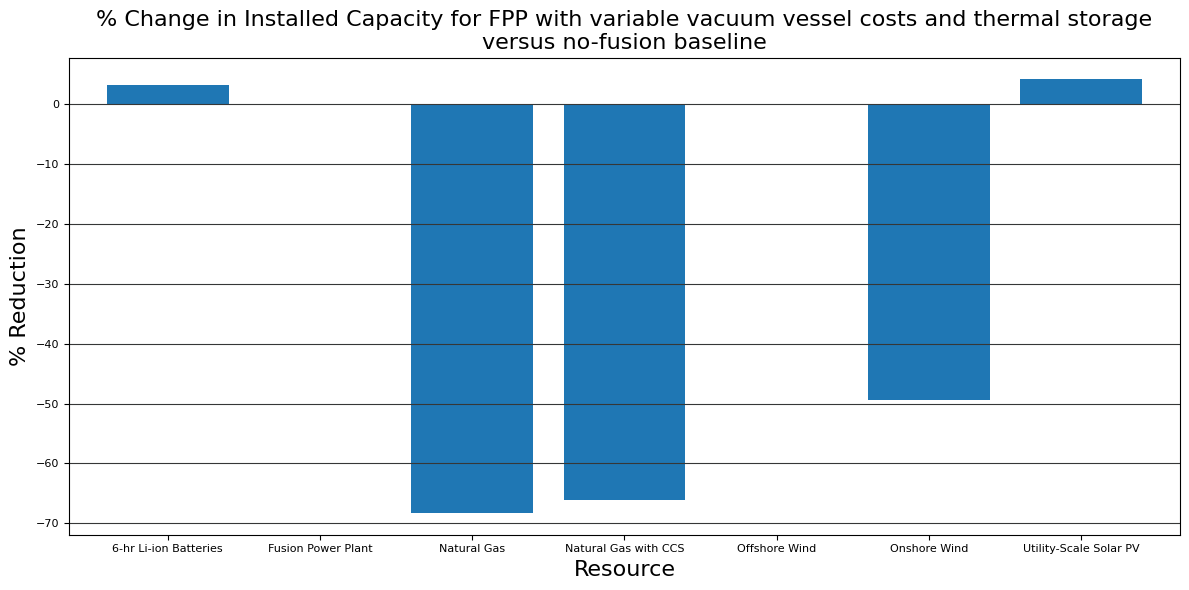

In [323]:
baseline_cap = cases[0]['capacity'].loc[:,'EndCap']

for case in cases: 
    if case['name'] != 'No fusion baseline':
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        temp_cap = 100 * (case['capacity'].loc[:,'EndCap'] - baseline_cap) / baseline_cap
        temp_cap.loc['Offshore Wind'] = 0
        temp_cap.plot.bar(ax=ax, width=0.8, fontsize=8, rot=0)
        # ax = temp_cap.plot.bar(width=0.8, fontsize=8, figsize=(12, 6), rot=0)
        ax.grid(True, axis='y', color='xkcd:dark grey')
        ax.set_xlabel('Resource', fontsize = 16)
        ax.set_ylabel('% Reduction', fontsize = 16)
        # ax.set_ylim([0, 27500])
        ax.set_title(f'% Change in Installed Capacity for {case["name"]}\nversus no-fusion baseline', fontsize = 16)
        fig.tight_layout()

# Cost savings